## **Performance Evaluation of Terapixel Rendering in Cloud (Super)computing**

In [2]:
# Installing the necessary dependencies
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=4b486910ee8d1d684ccb8cc710f36c809671847dd40af8c413baa3dab55e6e57
  Stored in directory: /root/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


In [3]:
# Importing the libraries
import pandas as pd 
import pandasql as ps 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import  coo_matrix

In [4]:
# Reading the datasets
df  = pd.read_csv('gpu.csv')
df1 = pd.read_csv('task-x-y.csv')
df2 = pd.read_csv('application-checkpoints.csv')

In [5]:
df.shape

(1543681, 8)

In [6]:
df1.shape

(65793, 5)

In [7]:
df2.shape

(660400, 6)

# **Data Preprocessing**
Data cleaning (removing all the redundant data from the dataframes)\
Pre-Processing the data so that CRISP-DM can be implemented

In [8]:
# Dropping all the duplicate values
df.drop_duplicates()
df1.drop_duplicates()
df2.drop_duplicates()

,timestamp,hostname,eventName,eventType,jobId,taskId
0,2018-11-08T07:41:55.921Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043
1,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
2,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
3,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
4,2018-11-08T07:43:13.957Z,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
...,...,...,...,...,...,...
660395,2018-11-08T08:30:10.296Z,0745914f4de046078517041d70b22fe700000I,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8261c0ff-03d6-48b3-a50f-da41cb3291fd
660396,2018-11-08T08:30:10.325Z,0745914f4de046078517041d70b22fe700000I,Uploading,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8261c0ff-03d6-48b3-a50f-da41cb3291fd
660397,2018-11-08T08:30:14.081Z,a77ef58b13ad4c01b769dac8409af3f800000H,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,ce97e3e9-494a-43a7-aa85-edd2db4cf099
660398,2018-11-08T08:30:14.127Z,a77ef58b13ad4c01b769dac8409af3f800000H,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,ce97e3e9-494a-43a7-aa85-edd2db4cf099


In [9]:
# Dropping all the null values
df.dropna()
df1.dropna()
df2.dropna()

,timestamp,hostname,eventName,eventType,jobId,taskId
0,2018-11-08T07:41:55.921Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043
1,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
2,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
3,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
4,2018-11-08T07:43:13.957Z,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
...,...,...,...,...,...,...
660395,2018-11-08T08:30:10.296Z,0745914f4de046078517041d70b22fe700000I,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8261c0ff-03d6-48b3-a50f-da41cb3291fd
660396,2018-11-08T08:30:10.325Z,0745914f4de046078517041d70b22fe700000I,Uploading,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8261c0ff-03d6-48b3-a50f-da41cb3291fd
660397,2018-11-08T08:30:14.081Z,a77ef58b13ad4c01b769dac8409af3f800000H,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,ce97e3e9-494a-43a7-aa85-edd2db4cf099
660398,2018-11-08T08:30:14.127Z,a77ef58b13ad4c01b769dac8409af3f800000H,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,ce97e3e9-494a-43a7-aa85-edd2db4cf099


In [10]:
# Merging gpu.csv and application-checkpoints.csv
df3 = pd.merge(df, df2, on = ["timestamp"])

In [11]:
# dividing merged data into Start and Stop
df3_start=df3[(df3['eventType']=='START')]
df3_stop=df3[(df3['eventType']=='STOP')]

# merging again on the basis of task id and eventname
df3_merge=pd.merge(df3_start,df3_stop,on=['taskId','eventName'])

# converting timestamp to date time
df3_merge['timestamp_x']=pd.to_datetime(df3_merge['timestamp_x'])
df3_merge['timestamp_y']=pd.to_datetime(df3_merge['timestamp_y'])

# calculating the duration and converting it into seconds.
df3_merge['timediff']=df3_merge['timestamp_y']-df3_merge['timestamp_x']
df3_merge['timediff']=(df3_merge['timediff'].dt.total_seconds())

In [12]:
# Dropping Duplicates and Null values
df3_merge.drop_duplicates()
df3_merge.dropna()

,timestamp_x,hostname_x_x,gpuSerial_x,gpuUUID_x,powerDrawWatt_x,gpuTempC_x,gpuUtilPerc_x,gpuMemUtilPerc_x,hostname_y_x,eventName,...,gpuSerial_y,gpuUUID_y,powerDrawWatt_y,gpuTempC_y,gpuUtilPerc_y,gpuMemUtilPerc_y,hostname_y_y,eventType_y,jobId_y,timediff
0,2018-11-08 08:27:10.875000+00:00,4a79b6d2616049edbf06c6aa58ab426a000008,325017019905,GPU-0e6e345c-ba46-d455-b6a1-ba8a2cfc62c0,77.87,36,90,40,265232c5f6814768aeefa66a7bec6ff6000010,Uploading,...,324917052614,GPU-bc05182a-0194-740f-827e-851d9ae28136,40.97,35,0,0,265232c5f6814768aeefa66a7bec6ff6000010,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,1.121
1,2018-11-08 08:27:10.624000+00:00,b9a1fa7ae2f74eb68f25f607980f97d700000B,324917052053,GPU-cd9e7193-8237-4e36-aa41-f5e30f10044a,88.47,40,91,48,04dc4e9647154250beeee51b866b0715000014,Render,...,325117172543,GPU-159afbfa-9b2e-ec8c-aff4-a920bd54b8ba,43.79,37,0,0,04dc4e9647154250beeee51b866b0715000014,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,46.741
2,2018-11-08 08:27:10.359000+00:00,4c72fae95b9147189a0559269a6953ff00000X,325117063055,GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3,146.32,43,93,52,6139a35676de44d6b61ec247f0ed8657000009,Uploading,...,323617020155,GPU-51b7ec74-a5ac-06b7-1fd0-9c11ce579ffc,28.05,39,0,0,6139a35676de44d6b61ec247f0ed8657000009,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,1.032
3,2018-11-08 08:27:10.359000+00:00,4c72fae95b9147189a0559269a6953ff00000X,325117063055,GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3,146.32,43,93,52,6139a35676de44d6b61ec247f0ed8657000009,Uploading,...,325117172395,GPU-50f23433-71f3-6f16-3c86-0de884dc7493,44.21,37,0,0,6139a35676de44d6b61ec247f0ed8657000009,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,1.032
4,2018-11-08 08:27:10.678000+00:00,83ea61ac1ef54f27a3bf7bd0f41ecaa700000T,323617021291,GPU-fa23937e-9287-a4f8-f648-3787bfa31054,71.59,41,89,42,6139a35676de44d6b61ec247f0ed865700001D,Render,...,323617043161,GPU-82ba6a59-510a-9995-4167-0945785066b3,27.05,35,0,0,6139a35676de44d6b61ec247f0ed865700001D,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,47.483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86628,2018-11-08 08:05:49.714000+00:00,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,97.68,41,91,57,04dc4e9647154250beeee51b866b0715000014,TotalRender,...,323617020277,GPU-636b97cd-9ff5-cbf0-9b18-e462e3b8a6fb,88.59,39,94,47,04dc4e9647154250beeee51b866b0715000014,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,48.771
86629,2018-11-08 08:05:49.714000+00:00,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,97.68,41,91,57,6139a35676de44d6b61ec247f0ed865700001A,Render,...,324917053014,GPU-fd95a940-581a-15ac-2e82-96c00f9e1a9a,122.93,47,92,45,6139a35676de44d6b61ec247f0ed865700001A,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,23.929
86630,2018-11-08 08:18:00.161000+00:00,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,70.32,37,81,29,265232c5f6814768aeefa66a7bec6ff600000U,Tiling,...,325217086360,GPU-13ba9276-da7a-8225-3302-c800e4c8ff07,96.21,39,92,43,265232c5f6814768aeefa66a7bec6ff600000U,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0.972
86631,2018-11-08 08:24:23.967000+00:00,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,124.28,39,89,45,6139a35676de44d6b61ec247f0ed8657000017,Saving Config,...,323617043182,GPU-78dfd50b-ffc4-bc85-3ab3-ac3a460d98bb,114.68,44,94,57,6139a35676de44d6b61ec247f0ed8657000017,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0.002


In [13]:
# Merging the XY Coordinates data with above merged data so that now the dataframes will contain all the 3 files's data
df4=pd.merge(df3_merge,df1,on=['taskId'])

In [14]:
# Removing/ Dropping the redundant columns from the final dataset
df5=df4.drop(columns=['timestamp_x','timestamp_y','hostname_x_x','hostname_x_y','gpuSerial_y', 'gpuUUID_y', 'powerDrawWatt_y','gpuTempC_y', 'gpuUtilPerc_y', 'gpuMemUtilPerc_y','hostname_y_y', 'eventType_y', 'jobId_y', 'gpuUUID_x','jobId_x','hostname_y_x', 'gpuSerial_x','eventType_x' ])

# **Methodology**
Basic EDA of each dataframe

In [15]:
df.head()

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08T08:27:10.314Z,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
1,2018-11-08T08:27:10.192Z,d8241877cd994572b46c861e5d144c85000000,323617020295,GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f,117.03,40,92,48
2,2018-11-08T08:27:10.842Z,db871cd77a544e13bc791a64a0c8ed50000006,323217056562,GPU-f4597939-a0b4-e78a-2436-12dbab9a350f,121.64,45,91,44
3,2018-11-08T08:27:10.424Z,b9a1fa7ae2f74eb68f25f607980f97d7000010,325217085931,GPU-ad773c69-c386-a4be-b214-1ea4fc6045df,50.23,38,90,43
4,2018-11-08T08:27:10.937Z,db871cd77a544e13bc791a64a0c8ed50000003,323217056464,GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2,141.82,41,90,47


In [16]:
df1.head()

,taskId,jobId,x,y,level
0,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12
1,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12
2,0003c380-4db9-49fb-8e1c-6f8ae466ad85,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,86,12
3,000993b6-fc88-489d-a4ca-0a44fd800bd3,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,235,11,12
4,000b158b-0ba3-4dca-bf5b-1b3bd5c28207,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,171,53,12


In [17]:
df2.head()

,timestamp,hostname,eventName,eventType,jobId,taskId
0,2018-11-08T07:41:55.921Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043
1,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
2,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
3,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
4,2018-11-08T07:43:13.957Z,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d


In [18]:
# Unique values
df.hostname.nunique()

1024

In [19]:
df2.hostname.nunique()


1024

In [20]:
df.gpuSerial.nunique()

1024

In [21]:
# Describe function
df.describe()

,gpuSerial,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
count,1.543681e+06,1.543681e+06,1.543681e+06,1.543681e+06,1.543681e+06
mean,3.239836e+11,8.919838e+01,4.007560e+01,6.305820e+01,3.341359e+01
std,1.228841e+09,3.975742e+01,3.800243e+00,4.144816e+01,2.300107e+01
min,3.201181e+11,2.255000e+01,2.600000e+01,0.000000e+00,0.000000e+00
25%,3.236170e+11,4.499000e+01,3.800000e+01,0.000000e+00,0.000000e+00
50%,3.236170e+11,9.659000e+01,4.000000e+01,8.900000e+01,4.300000e+01
75%,3.250170e+11,1.213400e+02,4.200000e+01,9.200000e+01,5.100000e+01
max,3.252171e+11,1.970100e+02,5.500000e+01,1.000000e+02,8.300000e+01


In [22]:
df1.describe()

,x,y,level
count,65793.000000,65793.000000,65793.000000
mean,127.031143,127.031143,11.984314
std,74.135963,74.135963,0.250965
min,0.000000,0.000000,4.000000
25%,63.000000,63.000000,12.000000
50%,127.000000,127.000000,12.000000
75%,191.000000,191.000000,12.000000
max,255.000000,255.000000,12.000000


In [23]:
df2.describe()

,timestamp,hostname,eventName,eventType,jobId,taskId
count,660400,660400,660400,660400,660400,660400
unique,363555,1024,5,2,3,65793
top,2018-11-08T07:41:31.776Z,0d56a730076643d585f77e00d2d8521a000000,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,f8b3dc8e-7b0b-4365-b974-4d879d32c4ce
freq,18,1240,132080,330200,657810,20


In [24]:
# Task ID counts per Task Levels
ps.sqldf('select level, count(taskId) from df1 group by level')

,level,count(taskId)
0,4,1
1,8,256
2,12,65536


In [25]:
# Remaining dataframes
df3.head()

,timestamp,hostname_x,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,hostname_y,eventName,eventType,jobId,taskId
0,2018-11-08T08:27:10.875Z,4a79b6d2616049edbf06c6aa58ab426a000008,325017019905,GPU-0e6e345c-ba46-d455-b6a1-ba8a2cfc62c0,77.87,36,90,40,265232c5f6814768aeefa66a7bec6ff6000010,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0fea60cb-e10d-4879-a50d-9c20926f50af
1,2018-11-08T08:27:10.875Z,4a79b6d2616049edbf06c6aa58ab426a000008,325017019905,GPU-0e6e345c-ba46-d455-b6a1-ba8a2cfc62c0,77.87,36,90,40,265232c5f6814768aeefa66a7bec6ff6000010,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0fea60cb-e10d-4879-a50d-9c20926f50af
2,2018-11-08T08:27:10.624Z,b9a1fa7ae2f74eb68f25f607980f97d700000B,324917052053,GPU-cd9e7193-8237-4e36-aa41-f5e30f10044a,88.47,40,91,48,04dc4e9647154250beeee51b866b0715000014,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,46496dde-fa77-4395-8cda-8705561b32dc
3,2018-11-08T08:27:10.624Z,b9a1fa7ae2f74eb68f25f607980f97d700000B,324917052053,GPU-cd9e7193-8237-4e36-aa41-f5e30f10044a,88.47,40,91,48,04dc4e9647154250beeee51b866b0715000014,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,46496dde-fa77-4395-8cda-8705561b32dc
4,2018-11-08T08:27:10.359Z,4c72fae95b9147189a0559269a6953ff00000X,325117063055,GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3,146.32,43,93,52,6139a35676de44d6b61ec247f0ed8657000009,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,723b6fff-9d27-4b67-8b9d-ae40a501b1bc


In [26]:
df3_merge.head()

,timestamp_x,hostname_x_x,gpuSerial_x,gpuUUID_x,powerDrawWatt_x,gpuTempC_x,gpuUtilPerc_x,gpuMemUtilPerc_x,hostname_y_x,eventName,...,gpuSerial_y,gpuUUID_y,powerDrawWatt_y,gpuTempC_y,gpuUtilPerc_y,gpuMemUtilPerc_y,hostname_y_y,eventType_y,jobId_y,timediff
0,2018-11-08 08:27:10.875000+00:00,4a79b6d2616049edbf06c6aa58ab426a000008,325017019905,GPU-0e6e345c-ba46-d455-b6a1-ba8a2cfc62c0,77.87,36,90,40,265232c5f6814768aeefa66a7bec6ff6000010,Uploading,...,324917052614,GPU-bc05182a-0194-740f-827e-851d9ae28136,40.97,35,0,0,265232c5f6814768aeefa66a7bec6ff6000010,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,1.121
1,2018-11-08 08:27:10.624000+00:00,b9a1fa7ae2f74eb68f25f607980f97d700000B,324917052053,GPU-cd9e7193-8237-4e36-aa41-f5e30f10044a,88.47,40,91,48,04dc4e9647154250beeee51b866b0715000014,Render,...,325117172543,GPU-159afbfa-9b2e-ec8c-aff4-a920bd54b8ba,43.79,37,0,0,04dc4e9647154250beeee51b866b0715000014,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,46.741
2,2018-11-08 08:27:10.359000+00:00,4c72fae95b9147189a0559269a6953ff00000X,325117063055,GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3,146.32,43,93,52,6139a35676de44d6b61ec247f0ed8657000009,Uploading,...,323617020155,GPU-51b7ec74-a5ac-06b7-1fd0-9c11ce579ffc,28.05,39,0,0,6139a35676de44d6b61ec247f0ed8657000009,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,1.032
3,2018-11-08 08:27:10.359000+00:00,4c72fae95b9147189a0559269a6953ff00000X,325117063055,GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3,146.32,43,93,52,6139a35676de44d6b61ec247f0ed8657000009,Uploading,...,325117172395,GPU-50f23433-71f3-6f16-3c86-0de884dc7493,44.21,37,0,0,6139a35676de44d6b61ec247f0ed8657000009,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,1.032
4,2018-11-08 08:27:10.678000+00:00,83ea61ac1ef54f27a3bf7bd0f41ecaa700000T,323617021291,GPU-fa23937e-9287-a4f8-f648-3787bfa31054,71.59,41,89,42,6139a35676de44d6b61ec247f0ed865700001D,Render,...,323617043161,GPU-82ba6a59-510a-9995-4167-0945785066b3,27.05,35,0,0,6139a35676de44d6b61ec247f0ed865700001D,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,47.483


In [27]:
df4.head()

,timestamp_x,hostname_x_x,gpuSerial_x,gpuUUID_x,powerDrawWatt_x,gpuTempC_x,gpuUtilPerc_x,gpuMemUtilPerc_x,hostname_y_x,eventName,...,gpuUtilPerc_y,gpuMemUtilPerc_y,hostname_y_y,eventType_y,jobId_y,timediff,jobId,x,y,level
0,2018-11-08 08:27:10.875000+00:00,4a79b6d2616049edbf06c6aa58ab426a000008,325017019905,GPU-0e6e345c-ba46-d455-b6a1-ba8a2cfc62c0,77.87,36,90,40,265232c5f6814768aeefa66a7bec6ff6000010,Uploading,...,0,0,265232c5f6814768aeefa66a7bec6ff6000010,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,1.121,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,32,174,12
1,2018-11-08 08:27:10.624000+00:00,b9a1fa7ae2f74eb68f25f607980f97d700000B,324917052053,GPU-cd9e7193-8237-4e36-aa41-f5e30f10044a,88.47,40,91,48,04dc4e9647154250beeee51b866b0715000014,Render,...,0,0,04dc4e9647154250beeee51b866b0715000014,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,46.741,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,167,224,12
2,2018-11-08 08:27:57.365000+00:00,4c72fae95b9147189a0559269a6953ff00000P,325117172543,GPU-159afbfa-9b2e-ec8c-aff4-a920bd54b8ba,43.79,37,0,0,04dc4e9647154250beeee51b866b0715000014,Uploading,...,91,47,04dc4e9647154250beeee51b866b0715000014,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,1.005,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,167,224,12
3,2018-11-08 08:27:10.359000+00:00,4c72fae95b9147189a0559269a6953ff00000X,325117063055,GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3,146.32,43,93,52,6139a35676de44d6b61ec247f0ed8657000009,Uploading,...,0,0,6139a35676de44d6b61ec247f0ed8657000009,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,1.032,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,248,255,12
4,2018-11-08 08:27:10.359000+00:00,4c72fae95b9147189a0559269a6953ff00000X,325117063055,GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3,146.32,43,93,52,6139a35676de44d6b61ec247f0ed8657000009,Uploading,...,0,0,6139a35676de44d6b61ec247f0ed8657000009,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,1.032,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,248,255,12


In [28]:
df5.head()

,powerDrawWatt_x,gpuTempC_x,gpuUtilPerc_x,gpuMemUtilPerc_x,eventName,taskId,timediff,jobId,x,y,level
0,77.87,36,90,40,Uploading,0fea60cb-e10d-4879-a50d-9c20926f50af,1.121,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,32,174,12
1,88.47,40,91,48,Render,46496dde-fa77-4395-8cda-8705561b32dc,46.741,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,167,224,12
2,43.79,37,0,0,Uploading,46496dde-fa77-4395-8cda-8705561b32dc,1.005,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,167,224,12
3,146.32,43,93,52,Uploading,723b6fff-9d27-4b67-8b9d-ae40a501b1bc,1.032,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,248,255,12
4,146.32,43,93,52,Uploading,723b6fff-9d27-4b67-8b9d-ae40a501b1bc,1.032,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,248,255,12


In [29]:
df5.describe()

,powerDrawWatt_x,gpuTempC_x,gpuUtilPerc_x,gpuMemUtilPerc_x,timediff,x,y,level
count,86633.000000,86633.000000,86633.000000,86633.000000,86633.000000,86633.000000,86633.000000,86633.000000
mean,91.607021,40.409336,65.439786,34.758279,17.193263,126.864451,126.418997,11.983794
std,38.756533,3.514294,40.346632,22.498336,20.595094,73.986865,73.894174,0.254093
min,22.860000,26.000000,0.000000,0.000000,0.002000,0.000000,0.000000,8.000000
25%,47.350000,38.000000,0.000000,0.000000,0.901000,62.000000,63.000000,12.000000
50%,98.360000,40.000000,90.000000,44.000000,1.065000,126.000000,126.000000,12.000000
75%,122.480000,42.000000,92.000000,51.000000,40.743000,191.000000,190.000000,12.000000
max,192.350000,55.000000,100.000000,78.000000,73.427000,255.000000,255.000000,12.000000


# **Case On Case Study and Evaluation of the Data**

# **Cycle 1:**

# **Case 1:**
Objective: To find the Event that dominates the task runtimes

In [31]:
# Calculating average time of each event excluding total render.
eventtime=ps.sqldf('select eventName, sum(timediff) as total_time  from df3_merge  where NOT eventName="TotalRender" group by eventName')
eventtime

,eventName,total_time
0,Render,703087.665
1,Saving Config,43.142
2,Tiling,16727.443
3,Uploading,23927.232


Text(0.5, 0, 'Event Name')

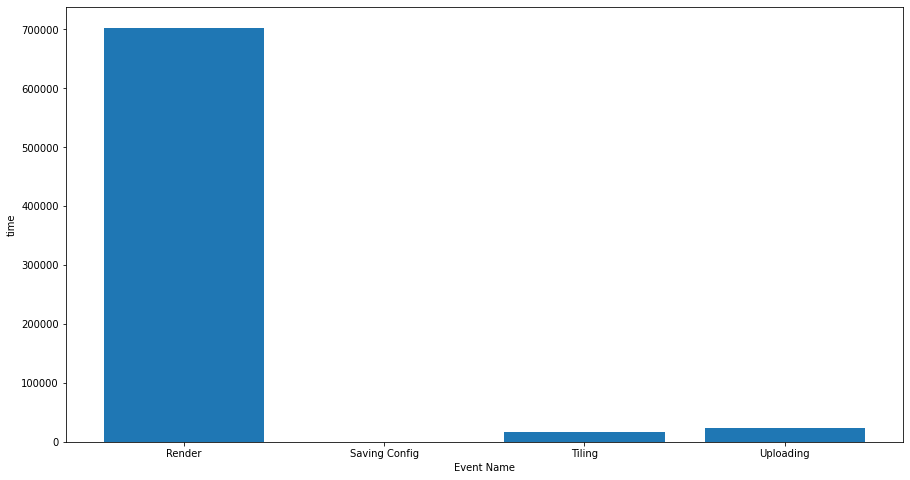

In [36]:
# Plotting Event Names with Time
plt.bar(eventtime.eventName,eventtime.total_time)
plt.ylabel('time')
plt.xlabel('Event Name')
#plt.rcParams['figure.figsize']=[15,8]

###Analysis and Evaluation:
Render consumes more GPU execution time than tiling and uploading do. As a result, the most demanding tasks should be assigned to the most powerful GPU when using the GPU. Render is that. Since the most powerful graphics processing unit uses the same amount of power for processing, performance will be better because the operation will take less time to complete. Therefore, rendering on powerful GPUs is recommended because stakeholders will be able to reduce costs.

# Case 2:
Objective: To analyze performance of particular events by GPUs in relation to their completion time

The performance of the events can be measured by:

1.   powerDrawWatt_x	
3.   gpuTempC_x	
4.   gpuUtilPerc_x	
5.   gpuMemUtilPerc_x	
6.   timediff

The types of Events are:
1. Render
2. Saving Config
3. Tiling
4. Uploading



In [40]:
# For Render 
df_render=ps.sqldf('select  timestamp_x,	hostname_x_x,	gpuSerial_x,	gpuUUID_x,	powerDrawWatt_x,	gpuTempC_x,	gpuUtilPerc_x	,gpuMemUtilPerc_x, eventName,timediff from df3_merge where eventName="Render" ')
df_render.head()

,timestamp_x,hostname_x_x,gpuSerial_x,gpuUUID_x,powerDrawWatt_x,gpuTempC_x,gpuUtilPerc_x,gpuMemUtilPerc_x,eventName,timediff
0,2018-11-08 08:27:10.624000,b9a1fa7ae2f74eb68f25f607980f97d700000B,324917052053,GPU-cd9e7193-8237-4e36-aa41-f5e30f10044a,88.47,40,91,48,Render,46.741
1,2018-11-08 08:27:10.678000,83ea61ac1ef54f27a3bf7bd0f41ecaa700000T,323617021291,GPU-fa23937e-9287-a4f8-f648-3787bfa31054,71.59,41,89,42,Render,47.483
2,2018-11-08 08:27:10.678000,83ea61ac1ef54f27a3bf7bd0f41ecaa700000T,323617021291,GPU-fa23937e-9287-a4f8-f648-3787bfa31054,71.59,41,89,42,Render,47.483
3,2018-11-08 08:27:10.678000,83ea61ac1ef54f27a3bf7bd0f41ecaa700000T,323617021291,GPU-fa23937e-9287-a4f8-f648-3787bfa31054,71.59,41,89,42,Render,47.483
4,2018-11-08 08:27:10.678000,83ea61ac1ef54f27a3bf7bd0f41ecaa700000T,323617021291,GPU-fa23937e-9287-a4f8-f648-3787bfa31054,71.59,41,89,42,Render,47.483


In [46]:
# Correlation matrix
correlation_matrix=df_render.corr()
round(correlation_matrix,2)

,gpuSerial_x,powerDrawWatt_x,gpuTempC_x,gpuUtilPerc_x,gpuMemUtilPerc_x,timediff
gpuSerial_x,1.00,-0.01,-0.16,-0.01,-0.01,-0.01
powerDrawWatt_x,-0.01,1.00,0.50,0.85,0.87,0.01
gpuTempC_x,-0.16,0.50,1.00,0.46,0.45,0.04
gpuUtilPerc_x,-0.01,0.85,0.46,1.00,0.97,0.02
gpuMemUtilPerc_x,-0.01,0.87,0.45,0.97,1.00,0.02
timediff,-0.01,0.01,0.04,0.02,0.02,1.00


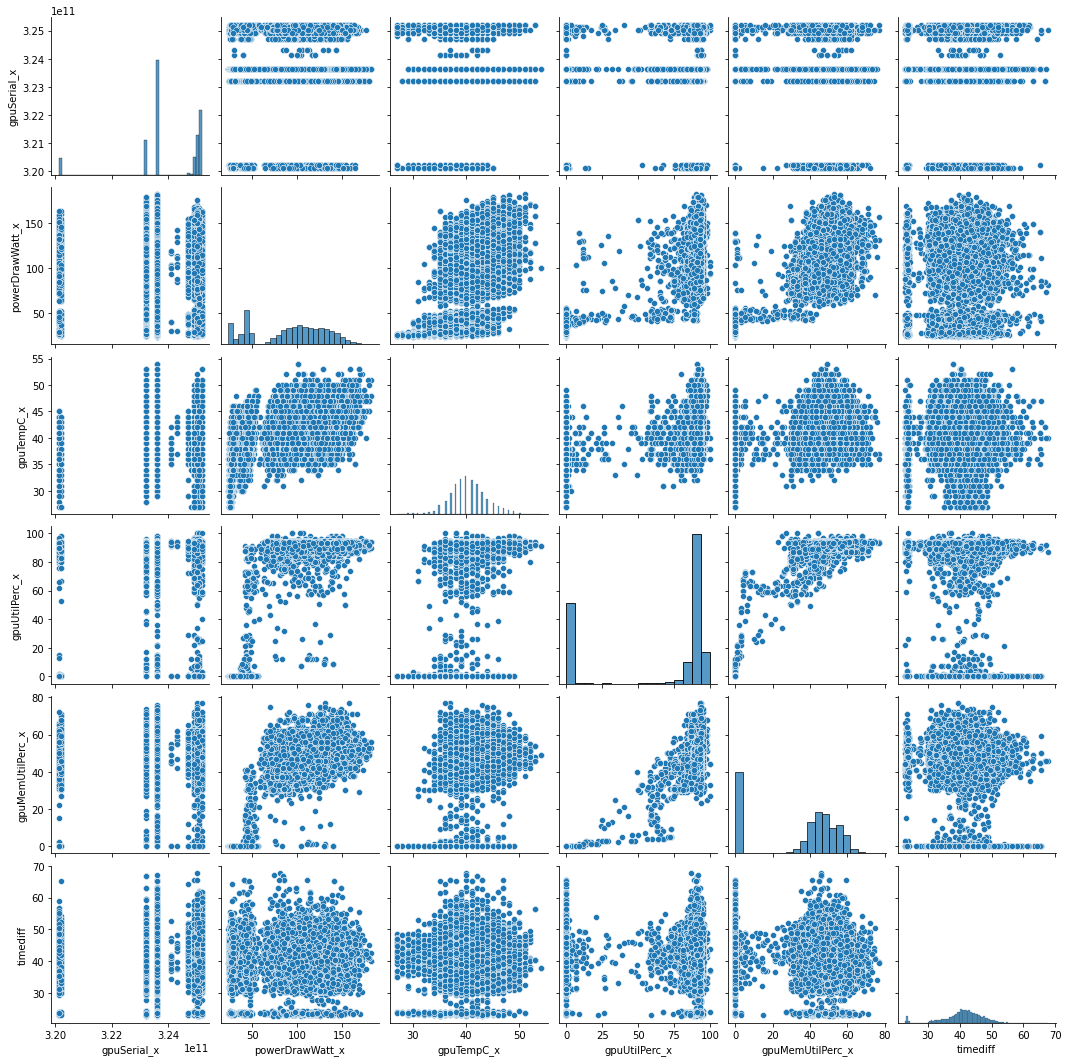

In [42]:
# Plotting the Correlation matrix to analyze it graphically
sns.pairplot(df_render)

In [52]:
# Average Rendering for every GPU parameter
df_render_avg=ps.sqldf('select avg(powerDrawWatt_x),	avg(gpuTempC_x), avg(gpuUtilPerc_x),	avg(gpuMemUtilPerc_x),avg(timediff) from df_render group by eventName')
df_render_avg

,avg(powerDrawWatt_x),avg(gpuTempC_x),avg(gpuUtilPerc_x),avg(gpuMemUtilPerc_x),avg(timediff)
0,91.307876,40.326308,64.990254,34.497505,41.27797


### Analysis and Evaluation
Render accurately depicts the entire data; the duration and GPU utilization can be divided into two parts. That clearly demonstrates that there are two types of graphics processing units (GPUs): one type is not performing at all and takes a significant amount of time to complete even simple tasks; on the other hand, it is evident that majorly powerful GPUs work for a shorter period of time to complete the same task to their full potential; however, some GPUs are not that capable and take time to complete the same task even when used to their full potential. Additionally, it is evident that the rendering task has an impact on the temperature.

In [48]:
# For Saving Config
df_sc=ps.sqldf('select  timestamp_x,	hostname_x_x,	gpuSerial_x,	gpuUUID_x,	powerDrawWatt_x,	gpuTempC_x,	gpuUtilPerc_x	,gpuMemUtilPerc_x, eventName,timediff from df3_merge where eventName="Saving Config" ')
df_sc.head()

,timestamp_x,hostname_x_x,gpuSerial_x,gpuUUID_x,powerDrawWatt_x,gpuTempC_x,gpuUtilPerc_x,gpuMemUtilPerc_x,eventName,timediff
0,2018-11-08 08:27:10.574000,a77ef58b13ad4c01b769dac8409af3f800000Y,323617020164,GPU-d480204b-d0c9-1631-fd55-7ae42e6470cf,141.29,41,94,58,Saving Config,0.003
1,2018-11-08 08:27:13.460000,265232c5f6814768aeefa66a7bec6ff600000S,323617043068,GPU-976b3bbd-fdea-ee53-615f-a98f28408299,125.99,44,94,53,Saving Config,0.002
2,2018-11-08 08:27:13.460000,0745914f4de046078517041d70b22fe700000E,325017017790,GPU-769c04e0-4916-d031-0e0c-7d13fdde3e3d,39.31,35,0,0,Saving Config,0.002
3,2018-11-08 08:27:13.460000,6139a35676de44d6b61ec247f0ed8657000019,320218055685,GPU-c5b20fb1-a8a2-3699-9def-2db4f6b0abc6,110.95,42,89,49,Saving Config,0.002
4,2018-11-08 08:27:13.460000,95b4ae6d890e4c46986d91d7ac4bf08200000S,325217085955,GPU-019fdcd4-8840-a5d2-9bce-7e19077e0f6c,88.22,40,93,54,Saving Config,0.002


In [49]:
# Correlation matrix
correlation_matrix=df_sc.corr()
round(correlation_matrix,2)

,gpuSerial_x,powerDrawWatt_x,gpuTempC_x,gpuUtilPerc_x,gpuMemUtilPerc_x,timediff
gpuSerial_x,1.00,-0.02,-0.17,-0.01,-0.00,-0.00
powerDrawWatt_x,-0.02,1.00,0.49,0.85,0.86,0.00
gpuTempC_x,-0.17,0.49,1.00,0.45,0.44,0.01
gpuUtilPerc_x,-0.01,0.85,0.45,1.00,0.96,-0.00
gpuMemUtilPerc_x,-0.00,0.86,0.44,0.96,1.00,-0.00
timediff,-0.00,0.00,0.01,-0.00,-0.00,1.00


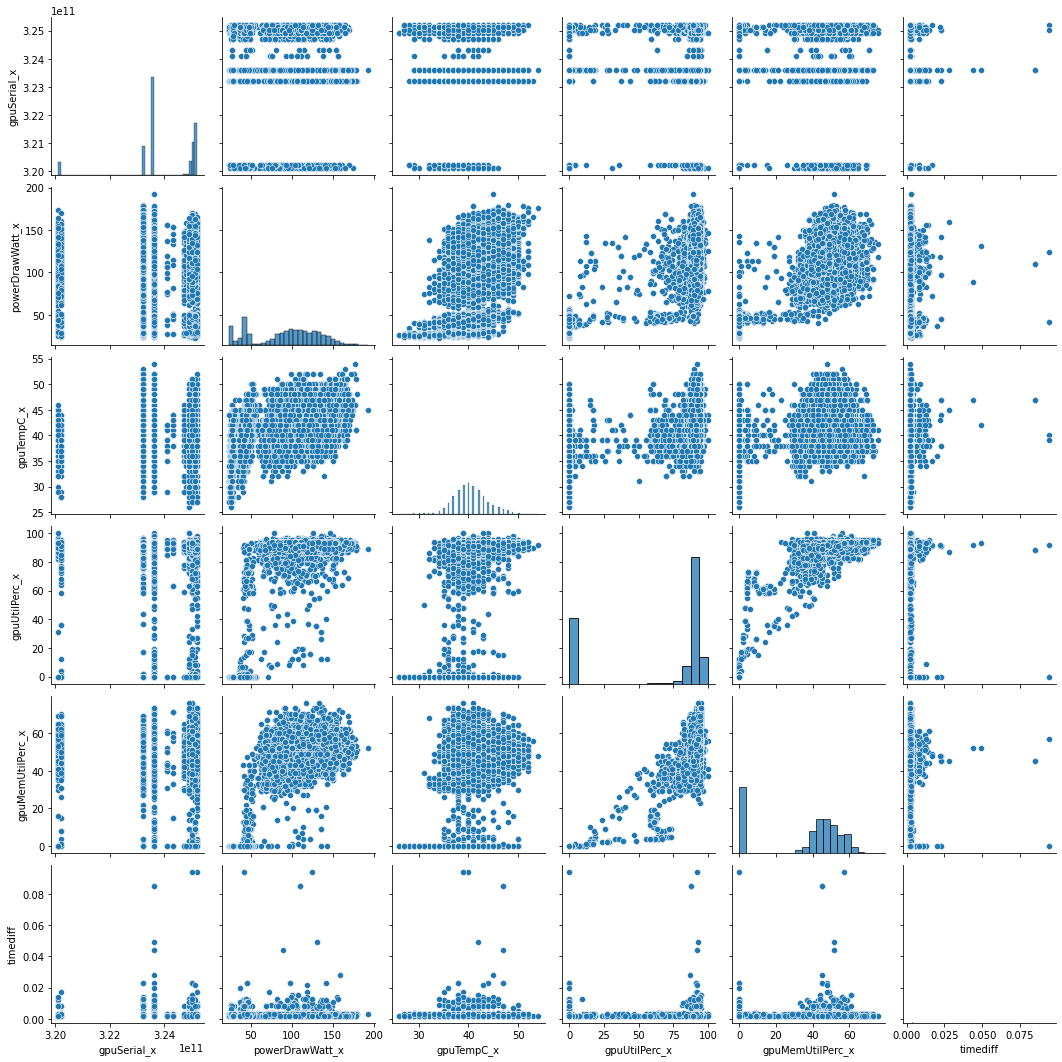

In [50]:
# Plotting the Correlation matrix to analyze it graphically
sns.pairplot(df_sc)

In [51]:
# Average Saving Config for every GPU parameter
df_sc_avg=ps.sqldf('select avg(powerDrawWatt_x),	avg(gpuTempC_x), avg(gpuUtilPerc_x),	avg(gpuMemUtilPerc_x),avg(timediff) from df_sc group by eventName')
df_sc_avg

,avg(powerDrawWatt_x),avg(gpuTempC_x),avg(gpuUtilPerc_x),avg(gpuMemUtilPerc_x),avg(timediff)
0,91.828857,40.41882,65.67448,34.963526,0.002466


### Analysis and Evaluation
It may be observed plainly. Because saving configuration event does not depend on time zone differences, it takes the minimal amount of time and is unaffected by changes in the computing power used. Therefore, it can be allocated to the weak GPU to complete several tasks at once.

In [53]:
# For Tiling
df_tiling=ps.sqldf('select  timestamp_x,	hostname_x_x,	gpuSerial_x,	gpuUUID_x,	powerDrawWatt_x,	gpuTempC_x,	gpuUtilPerc_x	,gpuMemUtilPerc_x, eventName,timediff from df3_merge where eventName="Tiling" ')
df_tiling.head()

,timestamp_x,hostname_x_x,gpuSerial_x,gpuUUID_x,powerDrawWatt_x,gpuTempC_x,gpuUtilPerc_x,gpuMemUtilPerc_x,eventName,timediff
0,2018-11-08 08:27:07.855000,5903af3699134795af7eafc605ae5fc7000014,325017020245,GPU-a7e39f02-521d-647e-a02e-64b49a138e50,49.81,40,0,0,Tiling,1.046
1,2018-11-08 08:27:07.855000,5903af3699134795af7eafc605ae5fc7000014,325017020245,GPU-a7e39f02-521d-647e-a02e-64b49a138e50,49.81,40,0,0,Tiling,1.046
2,2018-11-08 08:27:07.855000,0d56a730076643d585f77e00d2d8521a00000B,325017017512,GPU-971d7d26-9fb1-ab60-5180-75d82081d8cf,122.79,37,91,45,Tiling,1.046
3,2018-11-08 08:27:07.855000,0d56a730076643d585f77e00d2d8521a00000B,325017017512,GPU-971d7d26-9fb1-ab60-5180-75d82081d8cf,122.79,37,91,45,Tiling,1.046
4,2018-11-08 08:27:13.845000,83ea61ac1ef54f27a3bf7bd0f41ecaa7000018,323617021519,GPU-0d5cec28-4daf-bab0-b4e8-2e53a81b48b1,97.67,43,92,46,Tiling,1.125


In [54]:
# Correlation matrix
correlation_matrix=df_tiling.corr()
round(correlation_matrix,2)

,gpuSerial_x,powerDrawWatt_x,gpuTempC_x,gpuUtilPerc_x,gpuMemUtilPerc_x,timediff
gpuSerial_x,1.00,-0.01,-0.16,0.01,0.01,-0.01
powerDrawWatt_x,-0.01,1.00,0.48,0.85,0.86,0.00
gpuTempC_x,-0.16,0.48,1.00,0.45,0.43,0.03
gpuUtilPerc_x,0.01,0.85,0.45,1.00,0.96,0.00
gpuMemUtilPerc_x,0.01,0.86,0.43,0.96,1.00,0.01
timediff,-0.01,0.00,0.03,0.00,0.01,1.00


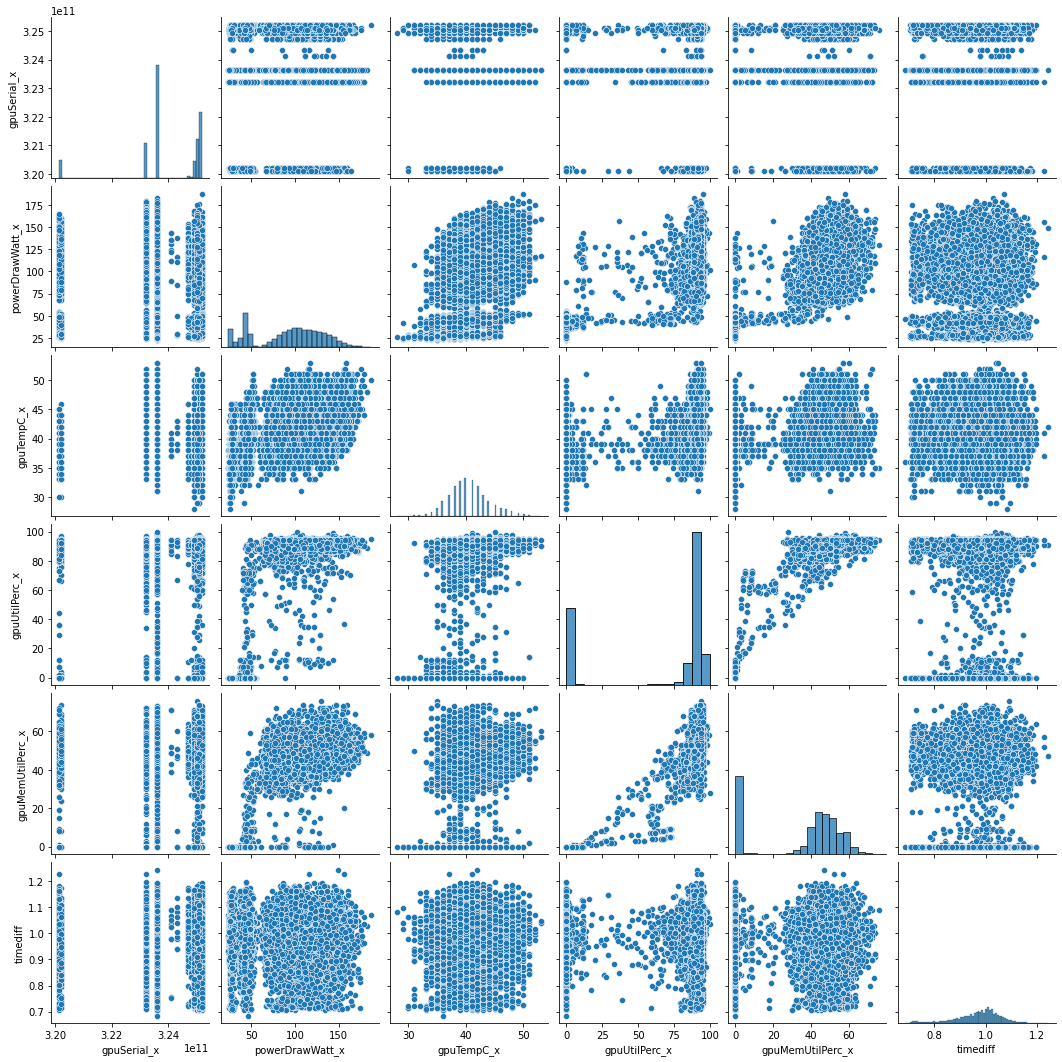

In [55]:
# Plotting the Correlation matrix to analyze it graphically
sns.pairplot(df_tiling)

In [57]:
# Average Tiling for every GPU parameter
df_tiling_avg=ps.sqldf('select avg(powerDrawWatt_x),	avg(gpuTempC_x), avg(gpuUtilPerc_x),	avg(gpuMemUtilPerc_x),avg(timediff) from df_tiling group by eventName')
df_tiling_avg

,avg(powerDrawWatt_x),avg(gpuTempC_x),avg(gpuUtilPerc_x),avg(gpuMemUtilPerc_x),avg(timediff)
0,92.071739,40.531967,65.994177,34.988995,0.973998


### Analysis and Evaluation
It has been observed that tiling requires numerous computational needs and takes time in a random manner. Therefore, it can be considered that this event may be task-specific, which means that depending on the pixel coordinates, then it might require different GPU configurations. Tiling may therefore be more task-dependent than computationally intensive, making GPU optimization in this case impossible.

In [58]:
# For Uploading 
df_uploading=ps.sqldf('select  timestamp_x,	hostname_x_x,	gpuSerial_x,	gpuUUID_x,	powerDrawWatt_x,	gpuTempC_x,	gpuUtilPerc_x	,gpuMemUtilPerc_x, eventName,timediff from df3_merge where eventName="Uploading" ')
df_uploading.head()

,timestamp_x,hostname_x_x,gpuSerial_x,gpuUUID_x,powerDrawWatt_x,gpuTempC_x,gpuUtilPerc_x,gpuMemUtilPerc_x,eventName,timediff
0,2018-11-08 08:27:10.875000,4a79b6d2616049edbf06c6aa58ab426a000008,325017019905,GPU-0e6e345c-ba46-d455-b6a1-ba8a2cfc62c0,77.87,36,90,40,Uploading,1.121
1,2018-11-08 08:27:10.359000,4c72fae95b9147189a0559269a6953ff00000X,325117063055,GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3,146.32,43,93,52,Uploading,1.032
2,2018-11-08 08:27:10.359000,4c72fae95b9147189a0559269a6953ff00000X,325117063055,GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3,146.32,43,93,52,Uploading,1.032
3,2018-11-08 08:27:15.057000,dcc19f48bb3445a28338db3a8f002e9c00000Y,323617020762,GPU-48504260-2b36-e796-830a-8dc7b9ab851a,102.97,42,89,42,Uploading,0.920
4,2018-11-08 08:27:15.883000,4c72fae95b9147189a0559269a6953ff00000V,325017049278,GPU-0c038861-d224-604e-f31b-e6b0fef9b6f3,106.59,42,90,44,Uploading,0.939


In [59]:
# Correlation matrix
correlation_matrix=df_uploading.corr()
round(correlation_matrix,2)

,gpuSerial_x,powerDrawWatt_x,gpuTempC_x,gpuUtilPerc_x,gpuMemUtilPerc_x,timediff
gpuSerial_x,1.00,-0.04,-0.18,-0.02,-0.02,0.00
powerDrawWatt_x,-0.04,1.00,0.48,0.85,0.85,-0.07
gpuTempC_x,-0.18,0.48,1.00,0.45,0.44,-0.14
gpuUtilPerc_x,-0.02,0.85,0.45,1.00,0.96,-0.05
gpuMemUtilPerc_x,-0.02,0.85,0.44,0.96,1.00,-0.05
timediff,0.00,-0.07,-0.14,-0.05,-0.05,1.00


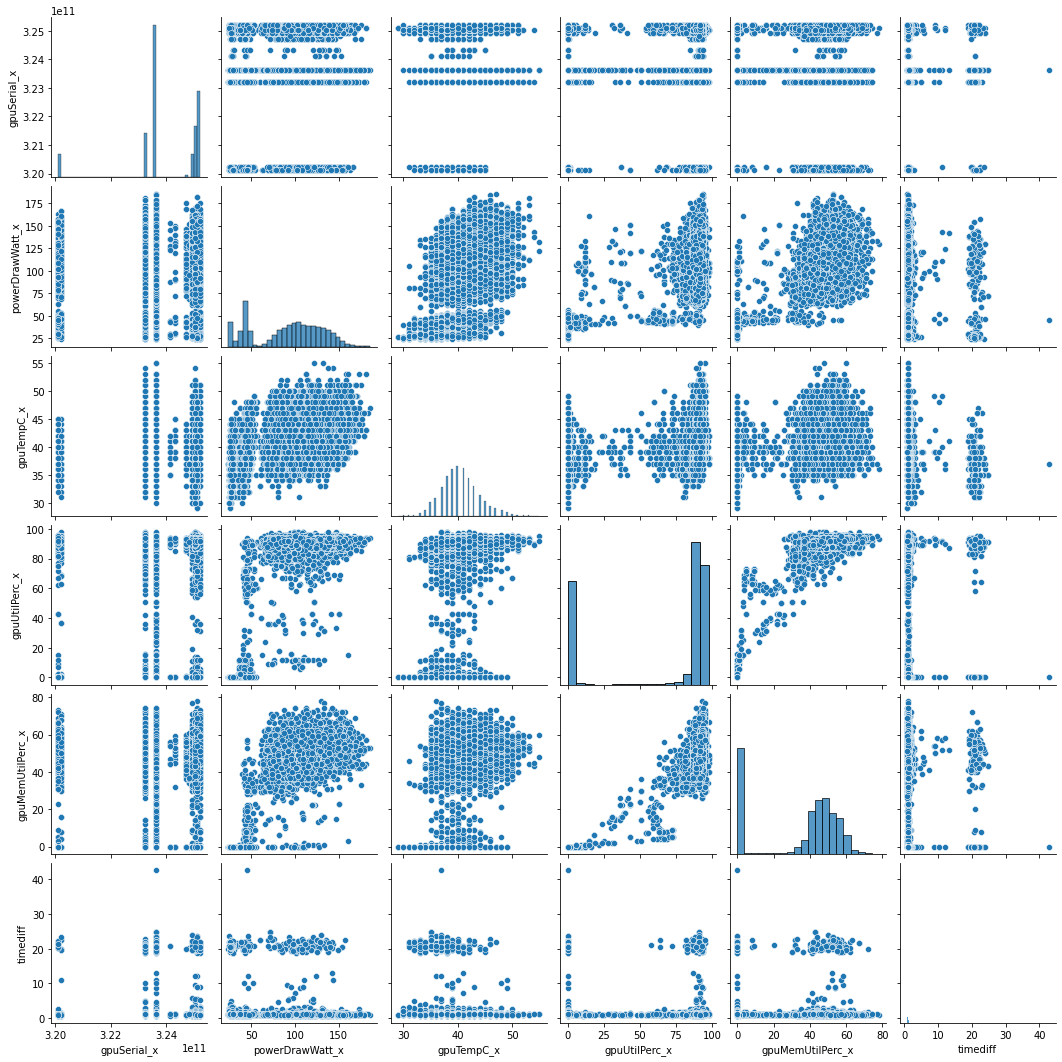

In [60]:
# Plotting the Correlation matrix to analyze it graphically
sns.pairplot(df_uploading)

In [63]:
# Average Uploading for every GPU parameter
df_uploading_avg=ps.sqldf('select avg(powerDrawWatt_x),	avg(gpuTempC_x), avg(gpuUtilPerc_x),	avg(gpuMemUtilPerc_x),avg(timediff) from df_uploading group by eventName')
df_uploading_avg

,avg(gpuSerial_x),avg(powerDrawWatt_x),avg(gpuTempC_x),avg(gpuUtilPerc_x),avg(gpuMemUtilPerc_x),avg(timediff)
0,3.239872e+11,91.572035,40.449708,65.517413,34.740807,1.37056


### Analysis and Evaluation
It is evident that the computing needs remain the same for uploading at this moment. Consequently, it can be scheduled for when the GPU will be required for subsequent events. In order to make the GPU available for other events, all of the GPUs can operate in parallel for this event, allowing it to be finished quickly.